In [1]:
# Importing the libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Importing the dataset
xyz = {'Occupation_code' : str, 'Industry_code' : str}
dataset = pd.read_csv("DataSet_for_Claim_model.csv", dtype = xyz)

from sklearn.preprocessing import LabelEncoder
lb_conv = LabelEncoder()
dataset["Gender"] = lb_conv.fit_transform(dataset["Gender"])
dataset["Occupation_code"] = lb_conv.fit_transform(dataset["Occupation_code"])
dataset["Workexperience_in_related_Occupation_code"] = lb_conv.fit_transform(dataset["Workexperience_in_related_Occupation_code"])
dataset["Race_code"] = lb_conv.fit_transform(dataset["Race_code"])
dataset["Industry_code"] = lb_conv.fit_transform(dataset["Industry_code"])
dataset["Event_code"] = lb_conv.fit_transform(dataset["Event_code"])
dataset["Nature_Code"] = lb_conv.fit_transform(dataset["Nature_Code"])
dataset["Part_of_Body_Code"] = lb_conv.fit_transform(dataset["Part_of_Body_Code"])

X = dataset.iloc[:, [0,1,2,4,6,8,10,12,14]].values
y = dataset.iloc[:,17].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

# param_grid = { 
#     'n_estimators': [20, 50, 30],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [6,7,8,9],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

# CV_rfc.best_params_

In [8]:
rfc1=RandomForestClassifier(max_features='auto', n_estimators= 20, max_depth=7, criterion='gini')
rfc1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfc1.predict(X_test)

#print(X_test)
print(len(y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# formula to calculate Accuracy
((cm[0][0]+cm[1][1])/len(y_pred))*100


1000
[[587   4]
 [ 82 327]]


91.4

Confusion matrix, without normalization
[[586   5]
 [ 82 327]]


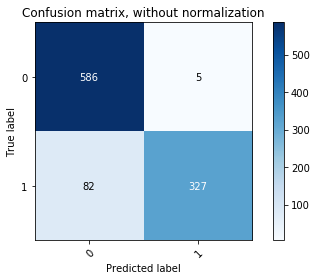

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,  title='Normalized confusion matrix')

plt.show()

In [5]:
#((320+189)/len(y_pred))*100
#print(X_train[51])
dataset

,Age,Gender,Occupation_code,Occupation_text,Length_of_Service_code,Length_of_Service_text,Ethnic_Origin_code,Ethnic_Origin_text,Industry_code,Industry_text,Event_code,Event_or_exposure,Nature_Code,Nature_of_injury,Part_of_Body_Code,Part_of_Body_affected,Days_away_from_work,Output
0,41,1,5,Funeral directors,2,1 - 5 years,6,Not reported,10,Poultry and eggs,7,Struck against object,14,"Open wounds, unspecified",14,Face,32,LONG
1,26,0,14,"Buyers, wholesale and retail trade exc. farm p...",0,Less than 3 months,0,"White, non-Hispanic",8,"Livestock, except dairy and poultry",3,Stepped on object,7,"Multiple traumatic injuries to bones, nerves, ...",16,"Nose, except internal location of diseases or ...",27,SHORT
2,54,0,3,"Managers, food serving and lodging establishments",2,1 - 5 years,4,American Indian or Alaskan Native,0,Agricultural production-crops,12,"Struck by flying object, unspecified",11,"Sprains, strains, tears",19,Sinuses,3,LONG
3,45,0,7,"Managers and administrators, n.e.c.",1,3 - 11 months,4,American Indian or Alaskan Native,16,"Animal services except, veterinary",1,"Contact with objects and equipment, unspecified",12,"Injuries to muscles, tendons, ligaments, joint...",5,Skull,34,LONG
4,33,1,10,Other financial officers,3,More than 5 years,6,Not reported,1,Cash grains,3,Stepped on object,0,All natures and conditions,9,Ear(s),8,SHORT
5,50,0,17,Financial managers,1,3 - 11 months,3,Asian or Pacific Islander,11,Animal specialties,12,"Struck by flying object, unspecified",6,"Traumatic injuries to nerves, except the spina...",16,"Nose, except internal location of diseases or ...",43,LONG
6,36,1,3,"Managers, food serving and lodging establishments",1,3 - 11 months,2,Hispanic,0,Agricultural production-crops,14,Struck by discharged object or substance,1,"Traumatic injuries and disorders, unspecified",1,"Head, unspecified",35,LONG
7,51,1,13,"Purchasing agents and buyers, farm products",3,More than 5 years,6,Not reported,2,"Field crops, except cash grains",14,Struck by discharged object or substance,7,"Multiple traumatic injuries to bones, nerves, ...",12,Eye(s),42,LONG
8,43,0,2,"Managers, medicine and health",3,More than 5 years,0,"White, non-Hispanic",9,Dairy farms,5,Struck against moving object,12,"Injuries to muscles, tendons, ligaments, joint...",12,Eye(s),14,LONG
9,52,1,1,"Administrators, education and related fields",2,1 - 5 years,6,Not reported,9,Dairy farms,9,Struck by falling object,2,"Traumatic injuries to bones, nerves, spinal co...",7,"Cranial region, n.e.c.",38,LONG


In [1]:
# Importing the libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Importing the dataset
xyz = {'Occupation_code' : str, 'Industry_code' : str}
dataset = pd.read_csv("DataSet_for_Claim_model.csv", dtype = xyz)


In [2]:
dataset

,Age,Gender,Occupation_code,Occupation_text,Workexperience_in_related_Occupation_code,Workexperience_in_related_Occupation,Race_code,Race,Industry_code,IndustryType,Event_code,Event_or_exposure,Nature_Code,Nature_of_injury,Part_of_Body_Code,Part_of_Body_affected,Days_away_from_work,Output
0,41,Male,190,Funeral directors,3XXX,1 - 5 years,NRXX,Not reported,250,Poultry and eggs,01XX,Struck against object,030X,"Open wounds, unspecified",03XX,Face,32,LONG
1,26,Female,290,"Buyers, wholesale and retail trade exc. farm p...",1XXX,Less than 3 months,1XXX,"White, non-Hispanic",210,"Livestock, except dairy and poultry",011X,Stepped on object,018X,"Multiple traumatic injuries to bones, nerves, ...",330,"Nose, except internal location of diseases or ...",27,SHORT
2,54,Female,170,"Managers, food serving and lodging establishments",3XXX,1 - 5 years,5XXX,American Indian or Alaskan Native,100,Agricultural production-crops,220,"Struck by flying object, unspecified",021X,"Sprains, strains, tears",334,Sinuses,3,LONG
3,45,Female,220,"Managers and administrators, n.e.c.",2XXX,3 - 11 months,5XXX,American Indian or Alaskan Native,750,"Animal services except, veterinary",00XX,"Contact with objects and equipment, unspecified",029X,"Injuries to muscles, tendons, ligaments, joint...",013X,Skull,34,LONG
4,33,Male,250,Other financial officers,4XXX,More than 5 years,NRXX,Not reported,110,Cash grains,011X,Stepped on object,0,All natures and conditions,02XX,Ear(s),8,SHORT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,20,Female,130,"Managers, marketing, advertising, and public r...",2XXX,3 - 11 months,1XXX,"White, non-Hispanic",290,"General farms, primarily livestock and animal ...",00XX,"Contact with objects and equipment, unspecified",020X,"Traumatic injuries to muscles, tendons, ligame...",00XX,"Head, unspecified",11,SHORT
3996,26,Female,280,"Purchasing agents and buyers, farm products",2XXX,3 - 11 months,6XXX,Multi-race,100,Agricultural production-crops,239,"Struck by swinging or slipping object, n.e.c.",030X,"Open wounds, unspecified",010X,"Cranial region, unspecified",18,SHORT
3997,37,Male,140,"Administrators, education and related fields",3XXX,1 - 5 years,3XXX,Hispanic,270,Animal specialties,011X,Stepped on object,030X,"Open wounds, unspecified",012X,Scalp,45,LONG
3998,33,Male,190,Funeral directors,4XXX,More than 5 years,6XXX,Multi-race,170,Fruit and tree nuts,221,"Struck by dislodged flying object, particle",031X,Amputations,0XXX,Head,19,SHORT


In [3]:
from sklearn.preprocessing import LabelEncoder
lb_conv = LabelEncoder()
dataset["Gender"] = lb_conv.fit_transform(dataset["Gender"])
# dataset["Occupation_code"] = lb_conv.fit_transform(dataset["Occupation_code"])
dataset["Workexperience_in_related_Occupation_code"] = lb_conv.fit_transform(dataset["Workexperience_in_related_Occupation_code"])
# dataset["Race_code"] = lb_conv.fit_transform(dataset["Race_code"])
# dataset["Industry_code"] = lb_conv.fit_transform(dataset["Industry_code"])
# dataset["Event_code"] = lb_conv.fit_transform(dataset["Event_code"])
# dataset["Nature_Code"] = lb_conv.fit_transform(dataset["Nature_Code"])
# dataset["Part_of_Body_Code"] = lb_conv.fit_transform(dataset["Part_of_Body_Code"])

# X = dataset.iloc[:, [0,1,2,4,6,8,10,12,14]].values
# y = dataset.iloc[:,17].values


In [4]:
dataset

,Age,Gender,Occupation_code,Occupation_text,Workexperience_in_related_Occupation_code,Workexperience_in_related_Occupation,Race_code,Race,Industry_code,IndustryType,Event_code,Event_or_exposure,Nature_Code,Nature_of_injury,Part_of_Body_Code,Part_of_Body_affected,Days_away_from_work,Output
0,41,1,190,Funeral directors,2,1 - 5 years,NRXX,Not reported,250,Poultry and eggs,01XX,Struck against object,030X,"Open wounds, unspecified",03XX,Face,32,LONG
1,26,0,290,"Buyers, wholesale and retail trade exc. farm p...",0,Less than 3 months,1XXX,"White, non-Hispanic",210,"Livestock, except dairy and poultry",011X,Stepped on object,018X,"Multiple traumatic injuries to bones, nerves, ...",330,"Nose, except internal location of diseases or ...",27,SHORT
2,54,0,170,"Managers, food serving and lodging establishments",2,1 - 5 years,5XXX,American Indian or Alaskan Native,100,Agricultural production-crops,220,"Struck by flying object, unspecified",021X,"Sprains, strains, tears",334,Sinuses,3,LONG
3,45,0,220,"Managers and administrators, n.e.c.",1,3 - 11 months,5XXX,American Indian or Alaskan Native,750,"Animal services except, veterinary",00XX,"Contact with objects and equipment, unspecified",029X,"Injuries to muscles, tendons, ligaments, joint...",013X,Skull,34,LONG
4,33,1,250,Other financial officers,3,More than 5 years,NRXX,Not reported,110,Cash grains,011X,Stepped on object,0,All natures and conditions,02XX,Ear(s),8,SHORT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,20,0,130,"Managers, marketing, advertising, and public r...",1,3 - 11 months,1XXX,"White, non-Hispanic",290,"General farms, primarily livestock and animal ...",00XX,"Contact with objects and equipment, unspecified",020X,"Traumatic injuries to muscles, tendons, ligame...",00XX,"Head, unspecified",11,SHORT
3996,26,0,280,"Purchasing agents and buyers, farm products",1,3 - 11 months,6XXX,Multi-race,100,Agricultural production-crops,239,"Struck by swinging or slipping object, n.e.c.",030X,"Open wounds, unspecified",010X,"Cranial region, unspecified",18,SHORT
3997,37,1,140,"Administrators, education and related fields",2,1 - 5 years,3XXX,Hispanic,270,Animal specialties,011X,Stepped on object,030X,"Open wounds, unspecified",012X,Scalp,45,LONG
3998,33,1,190,Funeral directors,3,More than 5 years,6XXX,Multi-race,170,Fruit and tree nuts,221,"Struck by dislodged flying object, particle",031X,Amputations,0XXX,Head,19,SHORT


In [ ]:

from sklearn.preprocessing import LabelEncoder
lb_conv = LabelEncoder()
dataset["Gender"] = lb_conv.fit_transform(dataset["Gender"])
dataset["Occupation_code"] = lb_conv.fit_transform(dataset["Occupation_code"])
dataset["Workexperience_in_related_Occupation_code"] = lb_conv.fit_transform(dataset["Workexperience_in_related_Occupation_code"])
dataset["Race_code"] = lb_conv.fit_transform(dataset["Race_code"])
dataset["Industry_code"] = lb_conv.fit_transform(dataset["Industry_code"])
dataset["Event_code"] = lb_conv.fit_transform(dataset["Event_code"])
dataset["Nature_Code"] = lb_conv.fit_transform(dataset["Nature_Code"])
dataset["Part_of_Body_Code"] = lb_conv.fit_transform(dataset["Part_of_Body_Code"])

X = dataset.iloc[:, [0,1,2,4,6,8,10,12,14]].values
y = dataset.iloc[:,17].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

# param_grid = { 
#     'n_estimators': [20, 50, 30],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [6,7,8,9],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

# CV_rfc.best_params_

In [ ]:
z  = CV_rfc(x,y)